<a href="https://colab.research.google.com/github/akshaymittur/FoodClassifier/blob/master/FoodClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#Make sure fastai is up-to-date
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
#Standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [0]:
#Import google drive and fastai package
from  google.colab import drive
from fastai.vision import *

In [57]:
#Connect workbook to google drive folder 
#Complete auth with the auth code
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Save path to project folder 
project_path = 'gdrive/My Drive/FoodClassifierData/'

In [0]:
#Save fastai path 
p_path = Path(project_path)

In [0]:
#Folder names 
folders = ['Cake', 'French Fries', 'Fried Chicken', 'Momos', 'Pasta', 'Pizza', 'Ribs', 'Salad', 'Sourdough Bread', 'Sushi']

In [0]:
#Create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=250, num_workers=4).normalize(imagenet_stats)

In [62]:
data.classes

['Cake',
 'French Fries',
 'Fried Chicken',
 'Momos',
 'Pasta',
 'Pizza',
 'Ribs',
 'Salad',
 'Sourdough Bread',
 'Sushi']

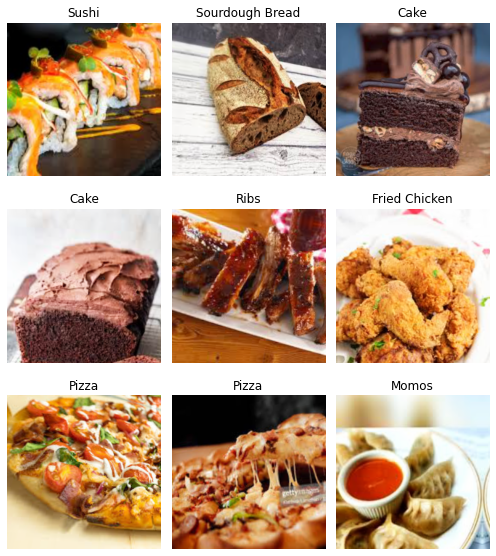

In [63]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [64]:
#Details
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cake',
  'French Fries',
  'Fried Chicken',
  'Momos',
  'Pasta',
  'Pizza',
  'Ribs',
  'Salad',
  'Sourdough Bread',
  'Sushi'],
 10,
 1630,
 407)

In [0]:
#Create cnn_learner object
#Use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [101]:
#Train 10 epochs of the model 
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.635393,0.357973,0.103194,00:21
1,0.856575,0.334180,0.073710,00:21
2,0.563380,0.269928,0.076167,00:21
3,0.414536,0.331009,0.081081,00:21
4,0.315840,0.296077,0.073710,00:21
5,0.239984,0.304406,0.076167,00:21
6,0.182233,0.270690,0.061425,00:21
7,0.136854,0.256436,0.054054,00:21
8,0.113929,0.257338,0.054054,00:21
9,0.094716,0.256227,0.056511,00:21


In [102]:
#Save model
learn.save('model1_resnet50', return_path=True)

PosixPath('gdrive/My Drive/FoodClassifierData/models/model1_resnet50.pth')

In [0]:
#Unfreeze model to train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


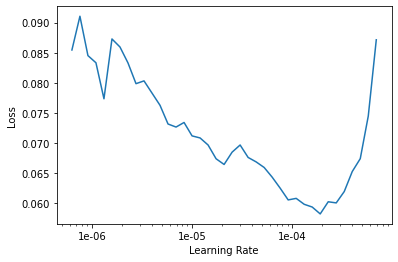

In [104]:
#Find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [105]:
#Fit model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.068593,0.261600,0.054054,00:22
1,0.063959,0.251943,0.051597,00:22


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


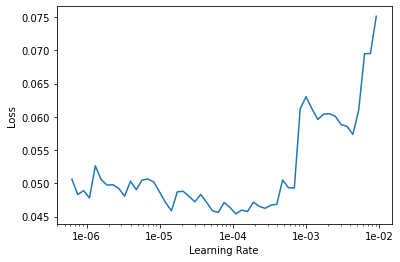

In [106]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [0]:
#Use 1st model since it shows lower error rates and has better fit
learn.save('model2_resnet50')
learn.load('model1_resnet50')

In [108]:
interp = ClassificationInterpretation.from_learner(learn)

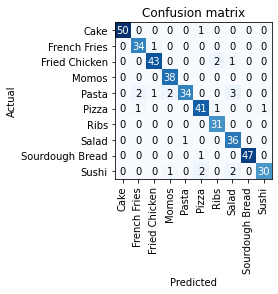

In [109]:
#Plot results of model on validation set 
interp.plot_confusion_matrix()

In [110]:
#Getting images to test first-hand
!wget -O pizza.jpg https://amazingribs.com/files/fixed-images/articles/pizza-and-flatbread-recipes/pizza-margherita.jpg
!wget -O friedchick.jpg https://www.knorr.com/content/dam/unilever/global/recipe_image/168/16858/168586-default.jpg/_jcr_content/renditions/cq5dam.web.800.600.jpeg
!wget -O salad.jpg https://www.feastingathome.com/wp-content/uploads/2017/06/Mediterranean-Chard-and-Chickpea-Salad-210.jpg

pizza = open_image('pizza.jpg')
friedchicken = open_image('friedchick.jpg')
salad = open_image('salad.jpg')

--2020-06-05 20:35:15--  https://amazingribs.com/files/fixed-images/articles/pizza-and-flatbread-recipes/pizza-margherita.jpg
Resolving amazingribs.com (amazingribs.com)... 172.67.72.198, 104.26.12.138, 104.26.13.138, ...
Connecting to amazingribs.com (amazingribs.com)|172.67.72.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26300 (26K) [image/jpeg]
Saving to: ‘pizza.jpg’

pizza.jpg           100%[===================>]  25.68K  --.-KB/s    in 0.004s  

2020-06-05 20:35:15 (5.67 MB/s) - ‘pizza.jpg’ saved [26300/26300]

--2020-06-05 20:35:18--  https://www.knorr.com/content/dam/unilever/global/recipe_image/168/16858/168586-default.jpg/_jcr_content/renditions/cq5dam.web.800.600.jpeg
Resolving www.knorr.com (www.knorr.com)... 23.52.55.181
Connecting to www.knorr.com (www.knorr.com)|23.52.55.181|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54438 (53K) [image/jpeg]
Saving to: ‘friedchick.jpg’

friedchick.jpg      100%[==============

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Salad


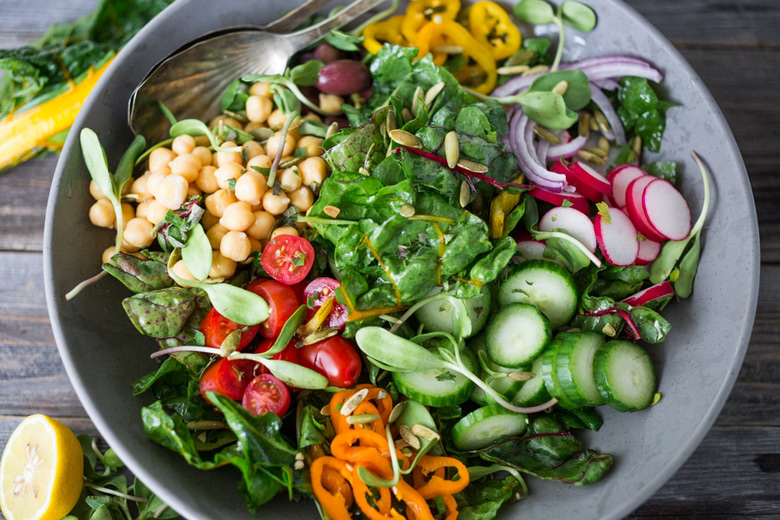

In [111]:
#Testing on random salad image
pred_class,pred_idx,outputs = learn.predict(salad)
print(pred_class.obj)
salad

Pizza


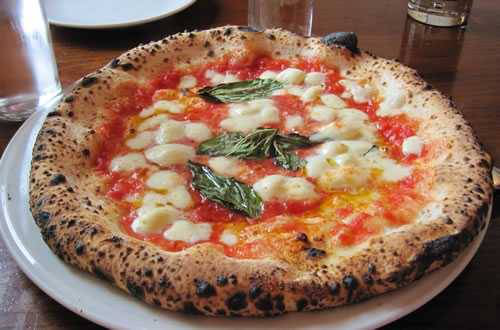

In [112]:
#Testing on random pizza image
pred_class,pred_idx,outputs = learn.predict(pizza)
print(pred_class.obj)
pizza

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


Fried Chicken


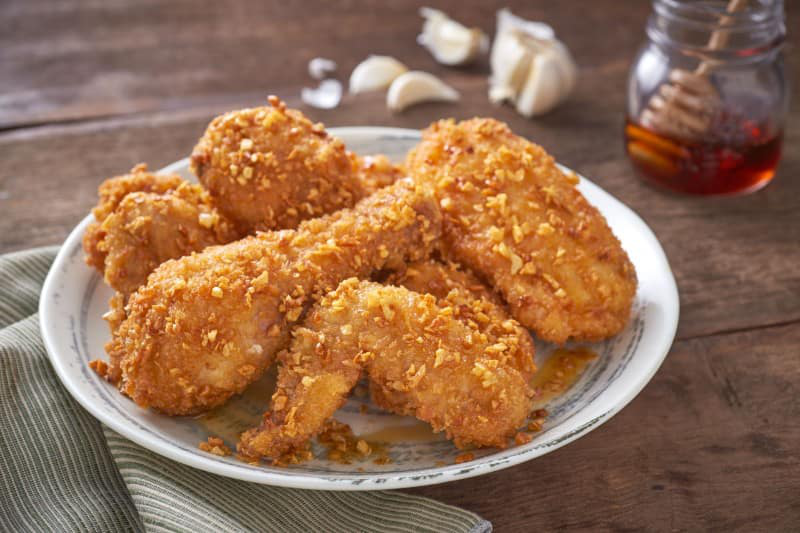

In [113]:
#Testing on random fried chicken image
pred_class,pred_idx,outputs = learn.predict(friedchicken)
print(pred_class.obj)
friedchicken